In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [270]:
twitter_df = pd.read_csv(r"D:\Hackathon\Twitter_Bot_Detector\Bot_Detector.ipynb\dataset\twitter_human_bots_dataset.csv")

In [271]:
twitter_df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [272]:
twitter_df.shape

(37438, 20)

In [273]:
(twitter_df.isnull().sum()/twitter_df.shape[0])*100

Unnamed: 0                       0.000000
created_at                       0.000000
default_profile                  0.000000
default_profile_image            0.000000
description                     19.384048
favourites_count                 0.000000
followers_count                  0.000000
friends_count                    0.000000
geo_enabled                      0.000000
id                               0.000000
lang                            21.253806
location                         0.010684
profile_background_image_url    12.017202
profile_image_url                0.002671
screen_name                      0.000000
statuses_count                   0.000000
verified                         0.000000
average_tweets_per_day           0.000000
account_age_days                 0.000000
account_type                     0.000000
dtype: float64

In [274]:
twitter_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [275]:
twitter_df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [276]:
twitter_df['account_type'].value_counts()

account_type
human    25013
bot      12425
Name: count, dtype: int64

In [277]:
(twitter_df['account_type'].value_counts()/twitter_df.shape[0])*100

account_type
human    66.811796
bot      33.188204
Name: count, dtype: float64

In [278]:
twitter_df['account_type'] = twitter_df['account_type'].map({'bot': 1, 'human': 0})

In [279]:
twitter_df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,0
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,0
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,0
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,0


In [280]:
twitter_df.drop('id', axis = 1, inplace = True)

In [281]:
twitter_df.head(2)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,0


In [282]:
twitter_df['default_profile'].value_counts()

default_profile
False    21718
True     15720
Name: count, dtype: int64

In [283]:
twitter_df['default_profile_image'].value_counts()

default_profile_image
False    36880
True       558
Name: count, dtype: int64

In [284]:
twitter_df['geo_enabled'].value_counts()

geo_enabled
False    20361
True     17077
Name: count, dtype: int64

In [285]:
twitter_df['verified'].value_counts()

verified
False    29887
True      7551
Name: count, dtype: int64

In [286]:
twitter_df[['default_profile','default_profile_image', 'geo_enabled', 'verified', 'account_type']].corr()

,default_profile,default_profile_image,geo_enabled,verified,account_type
default_profile,1.000000,0.115994,-0.273882,-0.264979,0.290070
default_profile_image,0.115994,1.000000,-0.095831,-0.058531,0.092601
geo_enabled,-0.273882,-0.095831,1.000000,0.196153,-0.336145
verified,-0.264979,-0.058531,0.196153,1.000000,-0.309593
account_type,0.290070,0.092601,-0.336145,-0.309593,1.000000


In [287]:
twitter_df.drop(['default_profile_image'], axis = 1, inplace = True)

In [288]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,Photographing the American West since 1980. I ...,536,860,880,False,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,0


In [289]:
twitter_df.shape

(37438, 17)

In [290]:
twitter_df.drop('screen_name', axis = 1, inplace = True)

In [291]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,11041,False,7.870,1403,1
1,2016-11-09 05:01:30,False,Photographing the American West since 1980. I ...,536,860,880,False,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,252,False,0.183,1379,0


In [292]:
bot_filt = (twitter_df['account_type'] == 1)
human_filt = (twitter_df['account_type'] == 0)

In [293]:
bot_bow = twitter_df.loc[bot_filt]['description'].str.strip().values
human_bow = twitter_df.loc[human_filt]['description'].str.strip().values

In [294]:
len(set(bot_bow))

7995

In [295]:
len(set(human_bow))


21985

In [296]:
set(bot_bow).intersection(set(human_bow))

{'#BlackLivesMatter',
 '.',
 '...',
 '17',
 ':)',
 '?',
 'Artist.',
 'Blessed',
 'Civil Engineer',
 'Gamer',
 'Hi',
 'Hi.',
 'Network Engineer',
 'Project Manager',
 'Rocket Ship Builder',
 'Sup.',
 'bye',
 'good vibes only',
 'happy',
 'hi',
 'idc',
 'l',
 'meow',
 'n',
 nan,
 'you already know.',
 '¯\\_(ツ)_/¯',
 '☕️',
 '☺',
 '♏',
 '♡',
 '🇲🇽',
 '👑',
 '💜💜',
 '🦋'}

In [297]:
len(set(bot_bow).intersection(set(human_bow)))

35

In [298]:
twitter_df['default_profile'] = twitter_df['default_profile'].map({True:1, False: 0})
twitter_df['geo_enabled'] = twitter_df['geo_enabled'].map({True:1, False: 0})
twitter_df['verified'] = twitter_df['geo_enabled'].map({True:1, False: 0})

In [299]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,profile_background_image_url,profile_image_url,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,11041,NaN,7.870,1403,1
1,2016-11-09 05:01:30,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,252,NaN,0.183,1379,0


In [300]:
twitter_df.drop(['profile_background_image_url', 'profile_image_url'], axis = 1, inplace = True)

In [301]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,NaN,7.870,1403,1
1,2016-11-09 05:01:30,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,NaN,0.183,1379,0


In [302]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              37438 non-null  object 
 1   default_profile         37438 non-null  int64  
 2   description             30181 non-null  object 
 3   favourites_count        37438 non-null  int64  
 4   followers_count         37438 non-null  int64  
 5   friends_count           37438 non-null  int64  
 6   geo_enabled             37438 non-null  int64  
 7   lang                    29481 non-null  object 
 8   location                37434 non-null  object 
 9   statuses_count          37438 non-null  int64  
 10  verified                0 non-null      float64
 11  average_tweets_per_day  37438 non-null  float64
 12  account_age_days        37438 non-null  int64  
 13  account_type            37438 non-null  int64  
dtypes: float64(2), int64(8), object(4)
mem

In [303]:
twitter_df['created_at'] = pd.to_datetime(twitter_df['created_at'])

In [304]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   created_at              37438 non-null  datetime64[ns]
 1   default_profile         37438 non-null  int64         
 2   description             30181 non-null  object        
 3   favourites_count        37438 non-null  int64         
 4   followers_count         37438 non-null  int64         
 5   friends_count           37438 non-null  int64         
 6   geo_enabled             37438 non-null  int64         
 7   lang                    29481 non-null  object        
 8   location                37434 non-null  object        
 9   statuses_count          37438 non-null  int64         
 10  verified                0 non-null      float64       
 11  average_tweets_per_day  37438 non-null  float64       
 12  account_age_days        37438 non-null  int64 

In [305]:
twitter_df['created_at'] = twitter_df['created_at'].dt.strftime('%H').astype(int)

In [306]:
twitter_df.head(2)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,21,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,NaN,7.870,1403,1
1,5,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,NaN,0.183,1379,0


In [307]:
twitter_df['period'] = (twitter_df['created_at'] % 24 + 4) // 4

In [308]:
twitter_df.head(3)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,period
0,21,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,NaN,7.870,1403,1,6
1,5,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,NaN,0.183,1379,0,2
2,5,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,en,"Los Angeles, CA",1001,NaN,0.864,1159,0,2


In [309]:
twitter_df['period'].nunique()

6

In [310]:
twitter_df['period'].value_counts()

period
5    8016
6    7869
1    6929
4    5994
2    4866
3    3764
Name: count, dtype: int64

In [311]:
twitter_df['period'].replace({1: 'Late Night',
                              2: 'Early Morning',
                              3: 'Morning',
                              4: 'Noon',
                              5: 'Evening',
                              6: 'Night'
                             }, inplace = True)

C:\Users\Shreyansh Mishra\AppData\Local\Temp\ipykernel_7732\3086150406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_df['period'].replace({1: 'Late Night',


In [312]:
twitter_df.head(3)

,created_at,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,period
0,21,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,NaN,7.870,1403,1,Night
1,5,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,NaN,0.183,1379,0,Early Morning
2,5,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,en,"Los Angeles, CA",1001,NaN,0.864,1159,0,Early Morning


In [313]:
twitter_df.groupby('period')['account_type'].value_counts()

period         account_type
Early Morning  0               3065
               1               1801
Evening        0               5653
               1               2363
Late Night     0               4870
               1               2059
Morning        0               2085
               1               1679
Night          0               5570
               1               2299
Noon           0               3770
               1               2224
Name: count, dtype: int64

In [314]:
twitter_df.drop(['period', 'created_at'], axis = 1, inplace = True)

In [315]:
twitter_df.head(2)

,default_profile,description,favourites_count,followers_count,friends_count,geo_enabled,lang,location,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,en,unknown,11041,NaN,7.870,1403,1
1,0,Photographing the American West since 1980. I ...,536,860,880,0,en,Estados Unidos,252,NaN,0.183,1379,0


In [316]:
grouped_twitter_df = twitter_df.groupby('account_type')

In [317]:
grouped_twitter_df.get_group(0).describe()      

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
count,25013.000000,25013.000000,2.501300e+04,2.501300e+04,25013.000000,2.501300e+04,0.0,25013.000000,25013.000000,25013.0
mean,0.318994,16186.048455,5.177475e+05,4.207621e+03,0.574141,2.146526e+04,NaN,6.712556,3173.561308,0.0
std,0.466096,37322.654404,2.916633e+06,4.764074e+04,0.494482,4.694461e+04,NaN,14.585320,995.928741,0.0
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,606.000000,0.0
25%,0.000000,649.000000,1.840000e+02,1.720000e+02,0.000000,2.093000e+03,NaN,0.715000,2542.000000,0.0
50%,0.000000,3649.000000,1.046000e+03,4.740000e+02,1.000000,7.551000e+03,NaN,2.410000,3395.000000,0.0
75%,1.000000,14955.000000,7.224600e+04,1.153000e+03,1.000000,2.238000e+04,NaN,6.933000,4032.000000,0.0
max,1.000000,885123.000000,1.216415e+08,4.343060e+06,1.000000,2.129049e+06,NaN,557.927000,5158.000000,0.0


In [318]:
grouped_twitter_df.get_group(1).describe()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
count,12425.000000,12425.000000,1.242500e+04,1.242500e+04,12425.000000,1.242500e+04,0.0,12425.000000,12425.000000,12425.0
mean,0.623018,4483.136740,7.350027e+04,4.925660e+03,0.218592,2.028449e+04,NaN,7.252241,2717.274930,1.0
std,0.484650,23913.709073,1.066970e+06,5.317140e+04,0.413307,9.603377e+04,NaN,37.310915,980.016502,0.0
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,483.000000,1.0
25%,0.000000,140.000000,8.000000e+00,0.000000e+00,0.000000,4.050000e+02,NaN,0.222000,1900.000000,1.0
50%,1.000000,1131.000000,2.500000e+01,3.100000e+01,0.000000,2.178000e+03,NaN,0.817000,2882.000000,1.0
75%,1.000000,2231.000000,1.930000e+02,2.470000e+02,0.000000,4.481000e+03,NaN,1.949000,3467.000000,1.0
max,1.000000,839929.000000,4.955794e+07,2.169597e+06,1.000000,2.771910e+06,NaN,1269.055000,5011.000000,1.0


In [319]:
twitter_df.drop('description', axis = 1, inplace = True)

In [320]:
twitter_df['lang'].nunique()

48

In [321]:
twitter_df['lang'].value_counts()

lang
en       21450
es        1213
pt         704
it         637
ar         594
de         536
ja         378
fr         375
af         333
id         313
ru         250
tr         220
ca         198
tl         192
sw         182
da         174
no         172
nl         165
ro         148
cy         143
sv         126
so         125
ko         115
et          95
zh-cn       91
fi          72
pl          62
vi          55
hr          50
sl          43
hu          35
sk          31
th          31
lt          28
sq          23
bg          20
el          18
mk          16
uk          13
fa          12
cs          12
ur           9
hi           8
lv           6
zh-tw        3
he           2
ne           2
pa           1
Name: count, dtype: int64

In [322]:
twitter_df['location'].nunique()

12049

In [323]:
twitter_df.drop(['lang', 'location'], axis = 1, inplace = True)

In [324]:
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,4,1589,4,0,11041,NaN,7.870,1403,1
1,0,536,860,880,0,252,NaN,0.183,1379,0
2,0,3307,172,594,1,1001,NaN,0.864,1159,0


In [325]:
twitter_df.isnull().sum()

default_profile               0
favourites_count              0
followers_count               0
friends_count                 0
geo_enabled                   0
statuses_count                0
verified                  37438
average_tweets_per_day        0
account_age_days              0
account_type                  0
dtype: int64

In [326]:
twitter_df = twitter_df.sample(frac=1.0, random_state=42)

In [327]:
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
36730,0,48,42,0,0,3458,NaN,1.006,3437,1
25960,1,609,264,345,0,4488,NaN,2.200,2040,1
12307,0,11283,1625,709,0,5527,NaN,3.685,1500,0


In [328]:
twitter_df.reset_index(inplace = True)

In [329]:
twitter_df.head(3)

,index,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,36730,0,48,42,0,0,3458,NaN,1.006,3437,1
1,25960,1,609,264,345,0,4488,NaN,2.200,2040,1
2,12307,0,11283,1625,709,0,5527,NaN,3.685,1500,0


In [330]:
twitter_df.drop('index', axis = 1, inplace = True)

In [331]:
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,48,42,0,0,3458,NaN,1.006,3437,1
1,1,609,264,345,0,4488,NaN,2.200,2040,1
2,0,11283,1625,709,0,5527,NaN,3.685,1500,0


In [332]:
twitter_df['verified'] = twitter_df['verified'].fillna(0)
twitter_df.head(3)

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,48,42,0,0,3458,0.0,1.006,3437,1
1,1,609,264,345,0,4488,0.0,2.200,2040,1
2,0,11283,1625,709,0,5527,0.0,3.685,1500,0


In [333]:
from sklearn.model_selection import train_test_split

In [334]:
def split_data(twitter_df):
    X_train, X_test, y_train, y_test = train_test_split(twitter_df.drop('account_type', axis = 1), twitter_df['account_type'], 
                                                        test_size=0.33, random_state=42, stratify = twitter_df['account_type'])
    return X_train, X_test, y_train, y_test

In [335]:
X_train, X_test, y_train, y_test = split_data(twitter_df)

In [336]:
X_train.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
10386,0,2790,659079,838,0,3165,0.0,0.762,4155
4620,1,233,275,391,0,3206,0.0,1.544,2076
11127,0,15120,514,0,0,14750,0.0,4.876,3025
35073,1,2470,7486,2461,1,200828,0.0,47.680,4212
5042,1,30,9,0,0,283,0.0,0.096,2936


In [337]:
X_test.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
13121,1,531,26,0,0,96,0.0,0.070,1379
27688,0,1759,2979,788,1,3998,0.0,1.384,2888
10523,1,14,0,0,0,105,0.0,0.091,1155
33894,1,1965,91,94,0,3717,0.0,1.001,3713
14680,0,27627,195,202,0,10825,0.0,3.067,3530


In [338]:
y_train

10386    0
4620     1
11127    1
35073    0
5042     0
        ..
15275    0
1701     0
25269    0
24271    1
26324    1
Name: account_type, Length: 25083, dtype: int64

In [339]:
y_test

13121    1
27688    0
10523    1
33894    1
14680    0
        ..
30258    0
1961     0
4618     0
27560    1
4201     0
Name: account_type, Length: 12355, dtype: int64

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [341]:
# Random Forest model
RFC = RandomForestClassifier()

In [342]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [343]:
RFC.score(X_train, y_train)

1.0

In [344]:
RFC.score(X_test, y_test)

0.8820720356131121

In [345]:
X_train.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
10386,0,2790,659079,838,0,3165,0.0,0.762,4155
4620,1,233,275,391,0,3206,0.0,1.544,2076
11127,0,15120,514,0,0,14750,0.0,4.876,3025
35073,1,2470,7486,2461,1,200828,0.0,47.680,4212
5042,1,30,9,0,0,283,0.0,0.096,2936


In [346]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [347]:
def scale_features(train_df,test_df,scale_type):
    to_be_scaled = ['favourites_count', 'followers_count', 'friends_count', 'statuses_count', 'average_tweets_per_day', 'account_age_days']
    if scale_type == "minmax":
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    
    train_df[to_be_scaled] = scaler.fit_transform(train_df[to_be_scaled])
    
    # We also need to apply the same scaler strategy on test dataset, instead of fit_transform, we just have to use transform
    test_df[to_be_scaled] = scaler.transform(test_df[to_be_scaled])
    
    return train_df, test_df

In [348]:
train_df, test_df = scale_features(X_train, X_test, 'minmax')

In [349]:
train_df.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
10386,0,0.003631,5.418210e-03,0.000193,0,0.001142,0.0,0.000640,0.785225
4620,1,0.000303,2.260742e-06,0.000090,0,0.001157,0.0,0.001296,0.340043
11127,0,0.019678,4.225533e-06,0.000000,0,0.005321,0.0,0.004093,0.543255
35073,1,0.003215,6.154151e-05,0.000567,1,0.072451,0.0,0.040024,0.797430
5042,1,0.000039,7.398792e-08,0.000000,0,0.000102,0.0,0.000081,0.524197


In [350]:
test_df.head()

,default_profile,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days
13121,1,0.000691,2.137429e-07,0.000000,0,0.000035,0.0,0.000059,0.190792
27688,0,0.002289,2.449000e-05,0.000181,1,0.001442,0.0,0.001162,0.513919
10523,1,0.000018,0.000000e+00,0.000000,0,0.000038,0.0,0.000076,0.142827
33894,1,0.002557,7.481001e-07,0.000022,0,0.001341,0.0,0.000840,0.690578
14680,0,0.035955,1.603072e-06,0.000047,0,0.003905,0.0,0.002575,0.651392


In [351]:
# Random Forest model
RFC = RandomForestClassifier()

In [352]:
RFC.fit(train_df, y_train)

RandomForestClassifier()

In [353]:
RFC.score(train_df, y_train)

0.9999601323605629

In [354]:
RFC.score(test_df, y_test)

0.8800485633346823

AUC Score: 0.9323372678790385


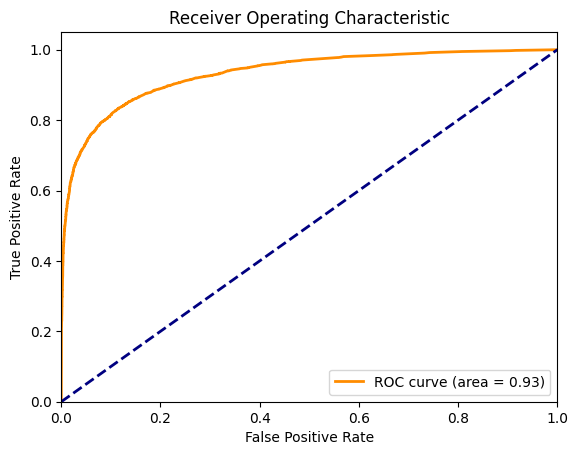

In [355]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = RFC.predict_proba(test_df)[:, 1]

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {roc_auc}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [356]:
# Assuming twitter_df is already defined and loaded
# Define features and target
X = twitter_df.drop('account_type', axis=1)
y = twitter_df['account_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
RFC = RandomForestClassifier(random_state=42)

# Fit the model
RFC.fit(X_train, y_train)

# Predict on the test set
y_pred = RFC.predict(X_test)

# Predict probabilities
y_pred_prob = RFC.predict_proba(X_test)[:, 1]

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)
print(f"AUC Score: {roc_auc_score(y_test, y_pred_prob)}")

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4974
           1       0.88      0.75      0.81      2514

    accuracy                           0.88      7488
   macro avg       0.88      0.85      0.86      7488
weighted avg       0.88      0.88      0.88      7488

AUC Score: 0.9354291080524054


In [357]:
import os
import joblib

# Define model directory
model_dir = "model"
os.makedirs(model_dir, exist_ok=True)  # Create 'model' directory if not exists

# Save the trained model
model_path = os.path.join(model_dir, "bot_detector.pkl")
joblib.dump(RFC, model_path)

print(f"Model saved at {model_path}")


Model saved at model\bot_detector.pkl
